# UC San Diego: Data Science in Practice - Data Checkpoint
### Summer Session I 2023 | Instructor : C. Alex Simpkins Ph.D.

## Title: Influence of Economy, Agriculture, and Depression on National BMI: An EDA Study

# Names

- Anna Ma
- Yanhao Ji
- Fangyu Zhu
- Wanting Zhou
- Yixuan Zhang
- Chimingyang Huang

<a id='research_question'></a>
# Research Question

- How do the economic status, agricultural productivity, and incidence of depression at a national level influence the population's body mass index (BMI)?


# Dataset(s)

###  Ⅰ. Life Expectancy Data.csv

- Dataset Source: [Link: https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who ]
- Data Type: Structured Data
- Number of Variables: 22
- Number of Observations: 2938

> **Interpretation:** The Global Health Observatory (GHO) is an essential data repository under the World Health Organization (WHO), diligently tracking and recording the health status and an array of related parameters for 193 countries globally from 2000 to 2015. The open-source nature of this dataset brings immense value to our project. Detailed analyses on various dimensions included in the dataset - such as immunization factors, mortality rates, economic factors, and social factors - allow us to deeply understand their potential impact on the expected health of nations, thereby uncovering existing health disparities and potential challenges.

###  Ⅱ. Crops AllData Normalized.csv

- Dataset Source: [Link: https://www.kaggle.com/datasets/raghavramasamy/crop-statistics-fao-all-countries ]
- Data Type: Structured Data
- Number of Variables: 11
- Number of Observations: 2,513,868

> **Interpretation:** This dataset, offered by the Environmental Statistics Team of the Food and Agriculture Organization (FAO) of the United Nations Statistics Division (ESS) and Mr. Salar Tayyib, encompasses production information for all primary crops worldwide. Our objective in analyzing these data is to probe the correlation between food data and population health across various nations. This analysis will facilitate an evaluation of how food supply influences public health, or shed light on the possible effects of food scarcity on the health expectancy in diverse countries.

### Ⅲ. Mental health Depression disorder Data.csv

- Dataset Source: [Link: https://www.kaggle.com/datasets/thedevastator/uncover-global-trends-in-mental-health-disorder ]
- Data Type: Structured Data
- Number of Variables: 11
- Number of Observations: 108,553 

> **Interpretation:** Supplied by the Our World in Data Institute, this dataset encompasses the prevalence rates of diverse mental disorders worldwide. Through analysis of this data, we can uncover patterns in how these disorders impact public health metrics and evaluate potential risk factors. This dataset is crucial for gauging the health status of populations. It offers a comparative lens for examining variances in the impact of different mental disorder rates across countries, thus highlighting the unique challenges and effects confronting various public health systems.

- **A Strategy for Integrating These Datasets: In the following exploratory data analysis (EDA), we will analyze data connected to a certain factor. We intend to combine our dataset with the 'Life Expectancy Data' dataset to look more into the association between this component and BMI. Because the 'Life Expectancy Data' dataset includes average BMI statistics for many locations, combining these two datasets will offer us with a more thorough perspective. We may obtain a richer dataset by integrating the associated datasets we are investigating with this average BMI data, which will contain the specific factor we are studying as well as the corresponding regions, allowing us to conduct a more insightful analysis.**

# Setup

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

# Data Wrangling

###  Ⅰ. Life Expectancy Data.csv

In [2]:
def data_wrangling(df):

    count_in_hundred = 100
    count_in_thousand = 1000

    rescaling = {
        'Adult Mortality': count_in_thousand,
        'infant deaths': count_in_thousand,
        'percentage expenditure': count_in_hundred,
        'Hepatitis B': count_in_hundred,
        'Measles ': count_in_thousand,
        'under-five deaths ': count_in_thousand,
        'Polio': count_in_hundred,
        'Total expenditure': count_in_hundred,
        'Diphtheria ': count_in_hundred,
        ' HIV/AIDS': count_in_thousand,
        ' thinness  1-19 years': count_in_hundred,
        ' thinness 5-9 years': count_in_hundred,
        }

    renaming = {
        'Life expectancy ': 'Life expectancy (Avg)',
        'Adult Mortality': 'Adult mortality (%)',
        'infant deaths': 'Infant deaths (%)',
        'Alcohol': 'Alcohol consumption (L)',
        'percentage expenditure': 'Percentage expenditure (%)',
        'Hepatitis B': 'Hepatitis B (%)',
        'Measles ': 'Measles (%)',
        ' BMI ': 'BMI (Avg)',
        'under-five deaths ': 'Under-five deaths (%)',
        'Polio': 'Polio (%)',
        'Total expenditure': 'Total expenditure (%)',
        'Diphtheria ': 'Diphtheria (%)',
        ' HIV/AIDS': 'HIV/AIDS (%)',
        'GDP': 'GDP pre capital ($)',
        ' thinness  1-19 years': 'Thinness 1-19 years (%)',
        ' thinness 5-9 years': 'Thinness 5-9 years (%)',
        'Schooling': 'Schooling (Year)',
        }

    df = df.apply(lambda col: ((col
                  / rescaling[col.name]) if col.name
                  in rescaling else col), axis=0)
    df = df.rename(columns=renaming)

    return df

> In the data wrangling step, we handled a CSV file containing data related to life expectancy and health factors for countries around the world. We converted some of the numbers in it to make them easier to understand. In our dataset, some numerical variables represent the number of occurrences per 1,000 people, while others represent the number of occurrences per 100 people. Through data wrangling, we unified these variables by converting them into corresponding percentage forms. In addition, there was confusion in many variable names, with some variable names all in lowercase and others having spaces or unclear expressions at the beginning or end. Our data-wrangling function resolved these issues. In addition to the above changes, our data wrangling function also added measurement tags in the modified variable names, to more intuitively understand the representation of values.

In [3]:
life_expectancy_data = pd.read_csv("Dataset_group05/Life Expectancy Data.csv")

print("\033[1m Dataset before wrangling (First row): \033[0m")
display(life_expectancy_data.head(1))

life_expectancy_data = data_wrangling(life_expectancy_data)

print("\033[1m Dataset after wrangling (First row): \033[0m")
display(life_expectancy_data.head(1))

 Dataset before wrangling (First row): 


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.25921,33736494.0,17.2,17.3,0.479,10.1


 Dataset after wrangling (First row): 


,Country,Year,Status,Life expectancy (Avg),Adult mortality (%),Infant deaths (%),Alcohol consumption (L),Percentage expenditure (%),Hepatitis B (%),Measles (%),...,Polio (%),Total expenditure (%),Diphtheria (%),HIV/AIDS (%),GDP pre capital ($),Population,Thinness 1-19 years (%),Thinness 5-9 years (%),Income composition of resources,Schooling (Year)
0,Afghanistan,2015,Developing,65.0,0.263,0.062,0.01,0.712796,0.65,1.154,...,0.06,0.0816,0.65,0.0001,584.25921,33736494.0,0.172,0.173,0.479,10.1


###  Ⅱ. Crops AllData Normalized.csv

In [4]:
def data_wrangling(df):
    
    def filter_data(df):
        df = df[df["Item"].str.contains("Wheat")]
        df = df[(df["Year"] >= 2000) & (df["Year"] <= 2015)]
        df = df.drop(
            columns=["Area Code", "Year Code", "Element Code", "Item Code", "Flag"]
        )
        return df

    def organize_data(df):
        organized_df = pd.pivot_table(
            df,
            index=["Area", "Year"],
            columns="Element",
            values="Value",
            aggfunc="first",
        )
        organized_df.reset_index(inplace=True)
        organized_df.rename_axis(None, axis=1, inplace=True)
        organized_df = organized_df.rename(
            columns={
                "Area harvested": "AreaHarvested (ha)",
                "Yield": "Yield_hg_per_ha (hg/ha)",
                "Production": "Production_tonnes (tonnes)",
            }
        )
        return organized_df

    df = filter_data(df)
    organized_df = organize_data(df)

    return organized_df


> In our original dataset, the "item" column encompasses a wide variety of crop types. However, considering our research focus is on the influence of wheat production on BMI, we decided to refine the dataset, selecting only data from the period 2000 to 2015 to allow for an in-depth analysis of this timeframe. By using the filter_data function, we managed to sift through the data and obtain the information of our interest. Meanwhile, the "element" column lists three key elements for each country per year, namely, the "Area harvested", "Production", and "Yield". We set out with a goal to extract these elements and integrate them as new variables into our dataset. We created several pivot tables with the help of the organize_data function, and used these pivot tables to structure our data, thereby facilitating more accurate and comprehensive analysis and research.

In [5]:
crops_normalized_data = pd.read_csv("Dataset_group05/Crops_AllData_Normalized.csv", encoding = "ISO-8859-1")

print("\033[1m Dataset before wrangling (First row): \033[0m")
display(crops_normalized_data.head(1))

crops_normalized_data = data_wrangling(crops_normalized_data)

print("\033[1m Dataset after wrangling (First row): \033[0m")
display(crops_normalized_data.head(1))

 Dataset before wrangling (First row): 


,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1975,1975,ha,0.0,F


 Dataset after wrangling (First row): 


,Area,Year,AreaHarvested (ha),Production_tonnes (tonnes),Yield_hg_per_ha (hg/ha)
0,Afghanistan,2000,2029000.0,1469000.0,7240.0


### Ⅲ. Mental health Depression disorder Data.csv

In [6]:
def data_wrangling(df):
    
    df = df.set_index('index')
    return df

> During the data wrangling process of the Mental Health Depression Disorder Data dataset, we observed the presence of a separate 'index' column in the original dataset. This resulted in duplicated indices in our final table. To address this issue, we decided to designate the existing 'index' column within the dataset as the new index for the entire dataset.

In [7]:
mental_health_data = pd.read_csv("Dataset_group05/Mental health Depression disorder Data.csv", low_memory=False)

print("\033[1m Dataset before wrangling (First row): \033[0m")
display(mental_health_data.head(1))

mental_health_data = data_wrangling(mental_health_data)

print("\033[1m Dataset after wrangling (First row): \033[0m")
display(mental_health_data.head(1))

 Dataset before wrangling (First row): 


,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.82883,1.677082,4.071831,0.672404


 Dataset after wrangling (First row): 


,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
index,,,,,,,,,,
0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.82883,1.677082,4.071831,0.672404


# Data Cleaning

###  Ⅰ. Life Expectancy Data.csv

In [8]:
missing = life_expectancy_data.copy()

missing = pd.DataFrame({'Missing count': missing.isna().sum(),
                       'Missing percent': (missing.isna().mean()
                       * 100).apply(lambda x: '{:.2f}%'.format(x)),
                       'Data type': missing.dtypes})

missing = missing.style.bar(subset=['Missing count'], align='zero', color = 'lightpink',
                  vmax=life_expectancy_data.shape[0])

display(missing)

,Missing count,Missing percent,Data type
Country,0,0.00%,object
Year,0,0.00%,int64
Status,0,0.00%,object
Life expectancy (Avg),10,0.34%,float64
Adult mortality (%),10,0.34%,float64
Infant deaths (%),0,0.00%,float64
Alcohol consumption (L),194,6.60%,float64
Percentage expenditure (%),0,0.00%,float64
Hepatitis B (%),553,18.82%,float64
Measles (%),0,0.00%,float64


In [9]:
def data_cleaning(df):

    def encode_status(status):
        return (0 if status == 'Developing' else 1)

    def decode_status(encoded_status):
        return ('Developing' if encoded_status == 0 else 'Developed')

    def scale_and_impute_data(data, scaler, imputer):
        data_scaled = scaler.fit_transform(data)
        data_imputed = imputer.fit_transform(data_scaled)
        return pd.DataFrame(data_imputed, columns=data.columns)

    def visualize_all(df_before, df_after):
        variables_with_missing = \
            list(df_before.columns[df_before.isna().any()])

        for i in range(0, len(variables_with_missing), 2):
            (fig, axs) = plt.subplots(1, 2, figsize=(18, 4))

            sns.histplot(df_before[variables_with_missing[i]],
                         kde=True, ax=axs[0], color='#fcc729',
                         alpha=0.2)
            sns.histplot(df_after[variables_with_missing[i]], kde=True,
                         ax=axs[0], color='#337def', alpha=0.2)
            axs[0].set_title(variables_with_missing[i])

            if i + 1 < len(variables_with_missing):
                sns.histplot(df_before[variables_with_missing[i + 1]],
                             kde=True, ax=axs[1], color='#fcc729',
                             alpha=0.2)
                sns.histplot(df_after[variables_with_missing[i + 1]],
                             kde=True, ax=axs[1], color='#337def',
                             alpha=0.2)
                axs[1].set_title(variables_with_missing[i + 1])

            fig.tight_layout(pad=3.0)
            plt.show()

    imputation = df.copy()

    country_data = imputation.pop('Country')
    imputation['Status'] = imputation['Status'].apply(encode_status)
    scaler = StandardScaler()
    KNNimputer = KNNImputer()
    imputation_data = scale_and_impute_data(imputation, scaler,
            KNNimputer)
    imputation_data = \
        pd.DataFrame(scaler.inverse_transform(imputation_data),
                     columns=imputation.columns)
    imputation_data['Status'] = imputation_data['Status'
            ].apply(decode_status)
    result = pd.concat([country_data, imputation_data], axis=1)

    visualize_all(imputation, result)
    return result

> In the above table, we observed that 14 out of 22 variables contain missing values. Specifically, the variable with the highest proportion of missing values is the 'Population' column, reaching 22.19%; while the variables with the lowest (non-zero) proportion of missing values are 'Life expectancy (Avg)' and 'Adult mortality (%)', each at 0.34%. Hence, we designed and implemented a data cleaning function named 'data_cleaning'. In this function, we created four subfunctions. 'encode_status' is used to perform feature engineering on the 'status' column, transforming categorical features into numerical features for use in machine learning models. The primary function of 'decode_status' is decoding, which can restore the original 'status' column after imputation. The 'scale_and_impute_data' function first normalizes the data, then inputs the normalized data into the KNNimputer, returning the processed data frame. The main role of 'visualize_all' function is to display the distribution of data before and after imputation. We used the KNNimputer based on the K-nearest neighbors algorithm for imputation, which can predict the missing values in our dataset more accurately. Finally, we saved the imputed dataset as 'life_expectancy_data_imputed', which has no missing values.

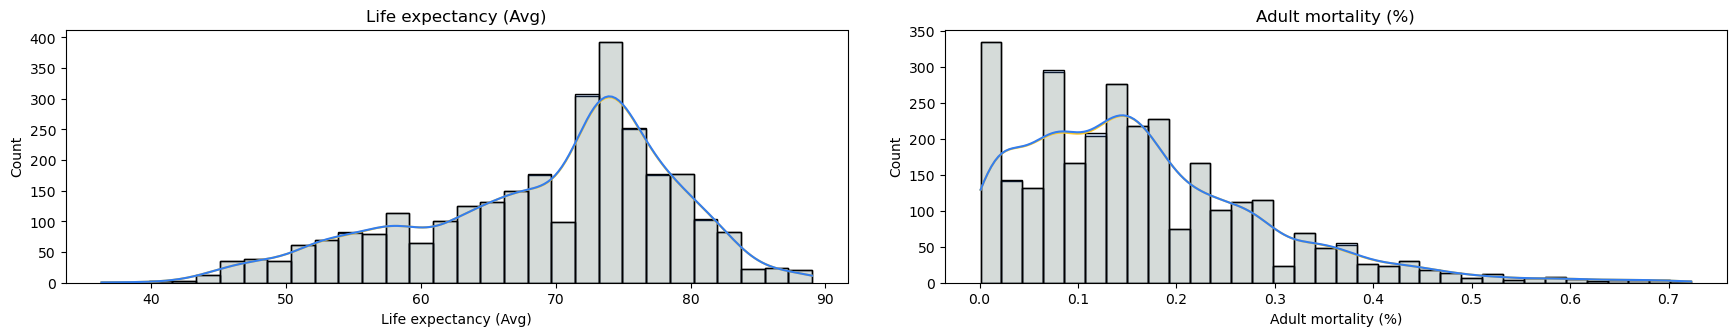

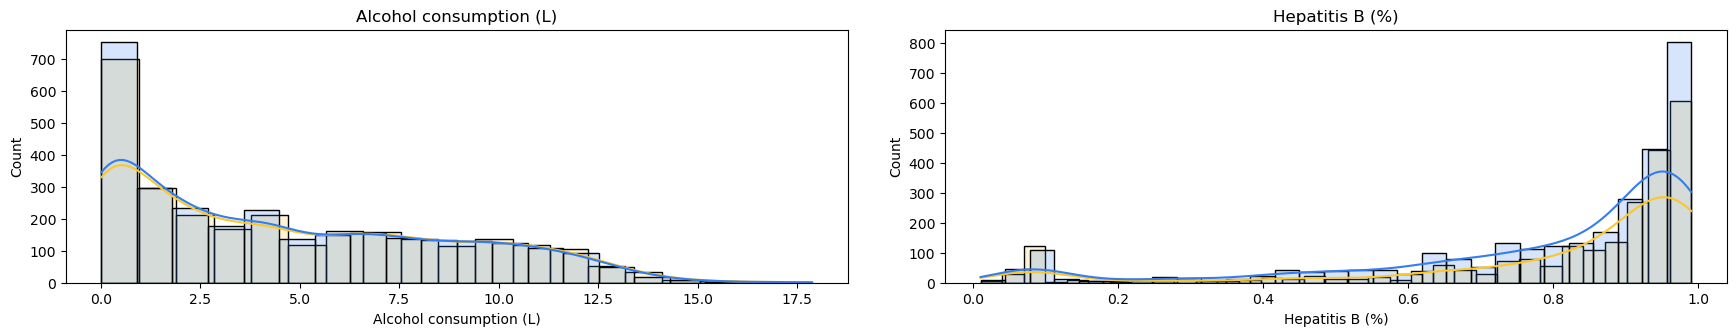

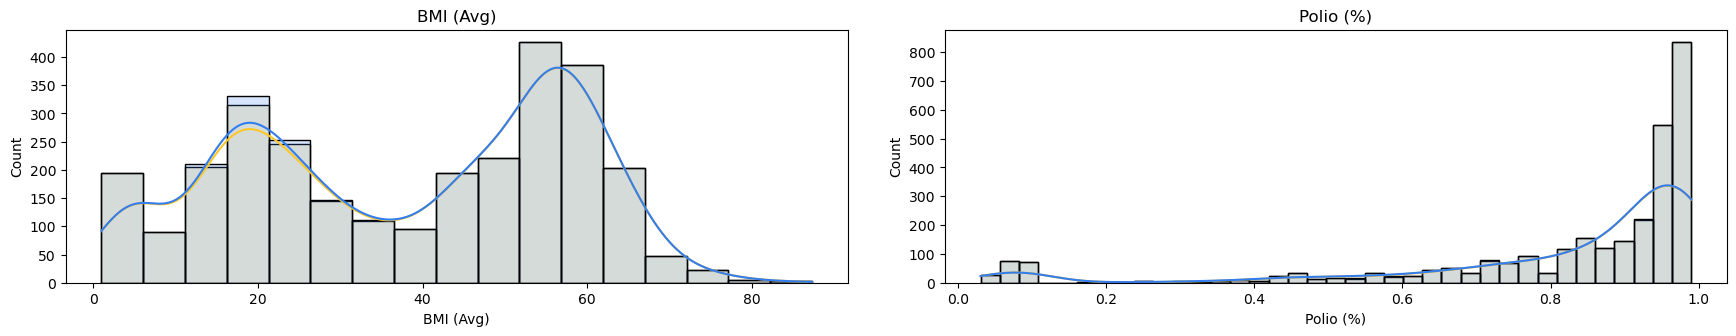

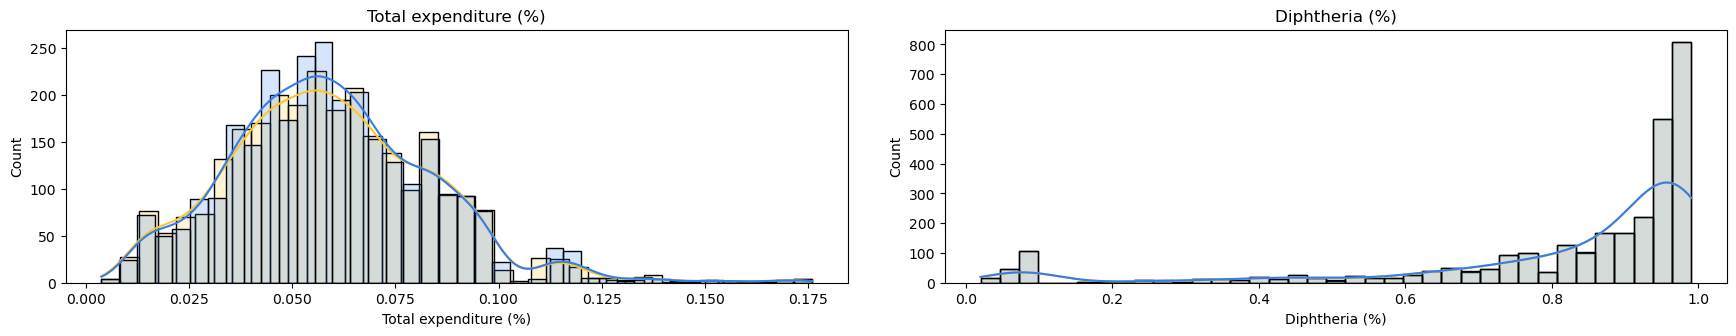

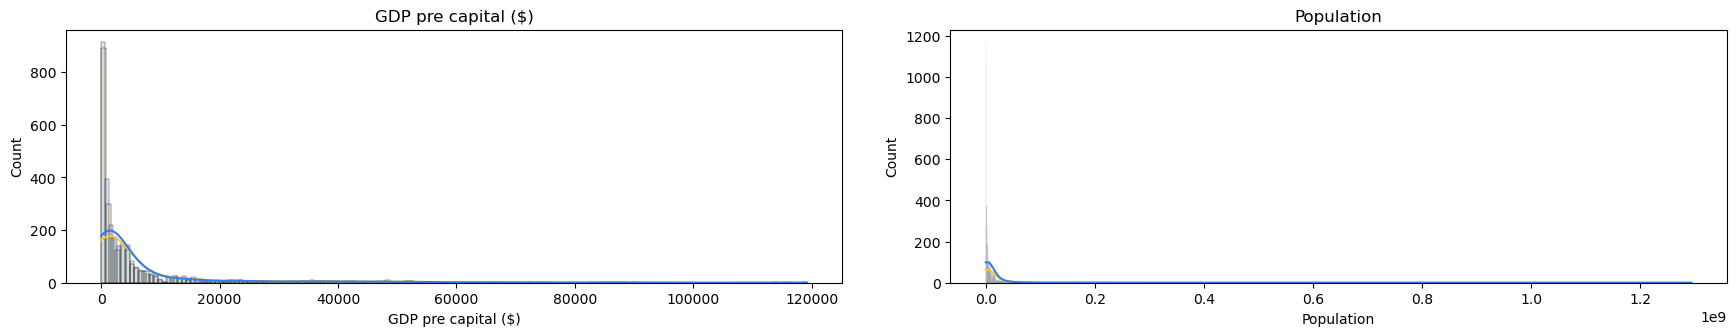

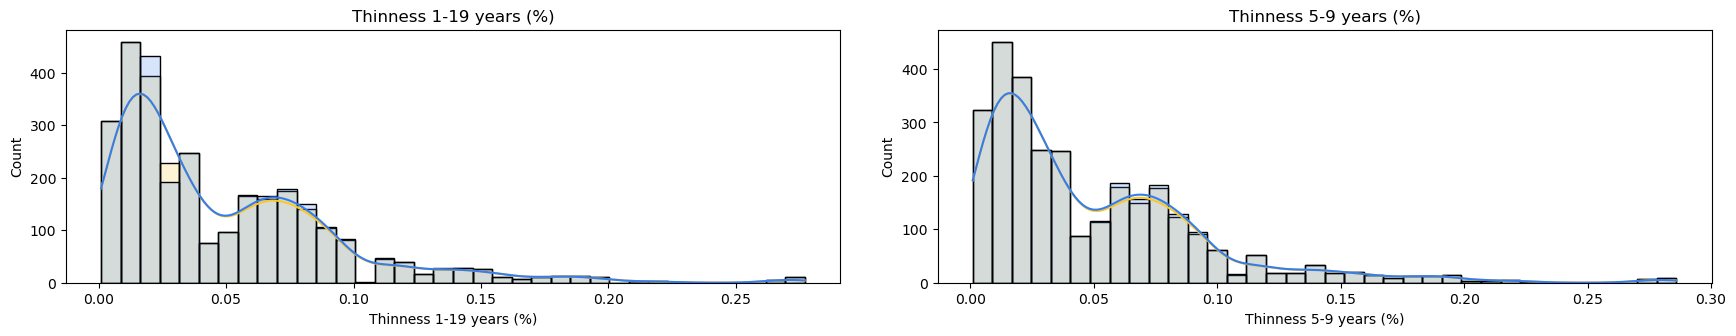

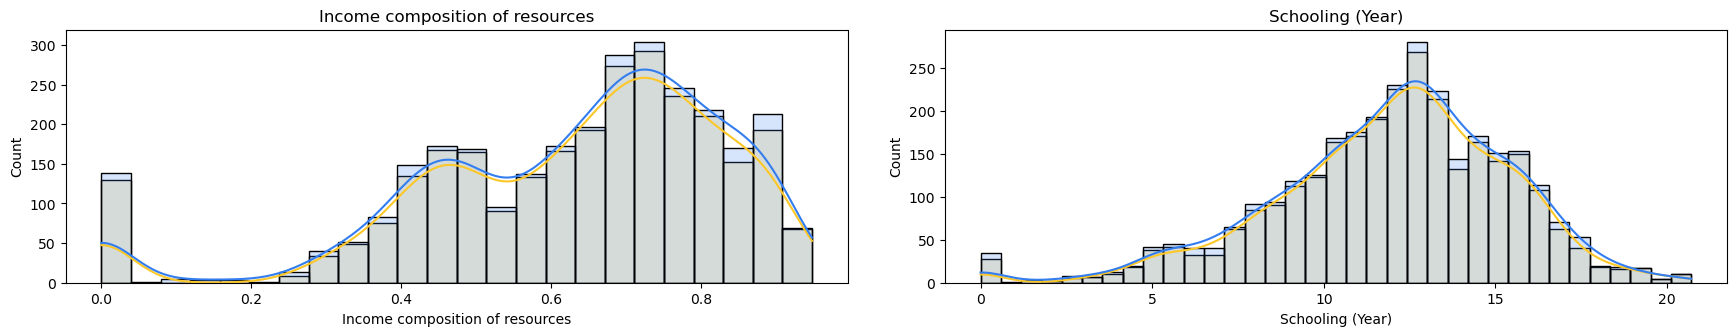

,Country,Year,Status,Life expectancy (Avg),Adult mortality (%),Infant deaths (%),Alcohol consumption (L),Percentage expenditure (%),Hepatitis B (%),Measles (%),...,Polio (%),Total expenditure (%),Diphtheria (%),HIV/AIDS (%),GDP pre capital ($),Population,Thinness 1-19 years (%),Thinness 5-9 years (%),Income composition of resources,Schooling (Year)
Missing count,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
economy = data_cleaning(life_expectancy_data)
display(pd.DataFrame(economy.isna().sum(axis = 0).rename('Missing count')).T)

###  Ⅱ. Crops AllData Normalized.csv

In [11]:
print("\033[1mNumber of missing values: \033[0m", crops_normalized_data.isna().sum().sum())

crops_normalized_data.isna().any().rename("Missing").to_frame().T.style.applymap(
    lambda val: f'background-color: {"lightpink" if val is True else ""}'
)

Number of missing values:  36


,Area,Year,AreaHarvested (ha),Production_tonnes (tonnes),Yield_hg_per_ha (hg/ha)
Missing,False,False,False,False,True


> In the data cleaning stage, through visualizing the missing values across various variables in the dataset, we identify 36 missing entries in the column "Yield_hg_per_ha (hg/ha)". Furthermore, our dataset includes countries with zero wheat production, a factor we will exclude from our subsequent analysis. Thus, we employ the 'dropna' function to remove these data points.

In [12]:
def data_cleaning(df):
    
    df = df.replace(0, np.nan)
    result = df.dropna()
    return result

In [13]:
wheat = data_cleaning(crops_normalized_data)

### Ⅲ. Mental health Depression disorder Data.csv

In [14]:
missing_values = mental_health_data.isnull().sum()
duplicate_rows = mental_health_data.duplicated().sum()
print("\033[1mNumber of missing values for each variable: \n\n \033[0m", missing_values.to_dict())
print("\033[1m \nNumber of duplicate rows: \033[0m", duplicate_rows)

Number of missing values for each variable: 

  {'Entity': 0, 'Code': 5412, 'Year': 0, 'Schizophrenia (%)': 82678, 'Bipolar disorder (%)': 89147, 'Eating disorders (%)': 8317, 'Anxiety disorders (%)': 102085, 'Drug use disorders (%)': 102085, 'Depression (%)': 102085, 'Alcohol use disorders (%)': 102085}
 
Number of duplicate rows:  9718


> In this dataset, we executed a comprehensive data-cleaning process to ensure the quality and accuracy of the data. Initially, we conducted a thorough review of missing values and designed a rational strategy for their handling. By analyzing these missing values, we discovered a pattern where the majority of fields had a consistent number of missing values, suggesting that the dataset might include multiple sub-datasets. Upon reviewing the original dataset's row at index 6468, we found that this row actually serves as the header row for the second part of the data, containing "Entity", "Code", "Year", "Prevalence in males (%)", "Prevalence in females (%)", and "Population", etc. As this portion of the data is irrelevant to our project goals, we decided to exclude the second part of the dataset and only use the first part as our research object. By using the split_dataframe function, we successfully split the primary dataset into the neatly formatted first and second parts, and displayed these two parts using the display_dataframe function. For the "Code" field, which would not impact subsequent analysis or modeling, we chose to remove it. Subsequently, we inspected the data types of each field and performed necessary conversions. Specifically, the "Year" field was converted from an object (string) type to an integer type, better aligning with its actual semantic use and application. The fields "Schizophrenia (%)", "Bipolar disorder (%)", and "Eating disorders (%)" represent percentages, but were currently object (string) types, hence we converted them into floating point types to facilitate numerical calculations. Additionally, we renamed the "Entity" field to "Country" to enhance understanding and analysis, and to maintain consistency with the naming conventions of other datasets in the project. Finally, we used the display_data_quality function to showcase the quality of our cleaned data.

In [15]:
def data_cleaning(df):

    def split_dataframe():
        header_row_index = df[df["Entity"] == "Entity"].index[0]
        df_part1 = df.loc[: header_row_index - 1]
        df_part2 = df.loc[header_row_index + 1 :]
        df_part2.columns = df.loc[header_row_index]

        df_part1.reset_index(drop=True, inplace=True)
        df_part2.reset_index(drop=True, inplace=True)
        return df_part1, df_part2

    def display_dataframe(df_part1, df_part2):
        print("\033[1m DataFrame Part One: \033[0m")
        display(df_part1.head(1))
        print("\033[1m DataFrame Part Two: \033[0m")
        display(df_part2.head(1))
        print('\n\n')

    def display_data_quality(df):
        missing_values = df.isnull().sum()
        duplicate_rows = df.duplicated().sum()

        print(
            "\033[1mNumber of missing values for each variable (DataFrame Part One): \n\n \033[0m",
            missing_values.to_dict(),
        )
        print(
            "\033[1m \nNumber of duplicate rows (DataFrame Part One): \033[0m",
            duplicate_rows,
        )

    df_part1, df_part2 = split_dataframe()
    display_dataframe(df_part1, df_part2)
    display_data_quality(df_part1)
    
    # Datatype convertion
    df = df_part1.drop(columns=["Code"])
    df['Year'] = df['Year'].astype(int)
    percentage_columns = ['Schizophrenia (%)', 'Bipolar disorder (%)', 'Eating disorders (%)']
    df[percentage_columns] = df[percentage_columns].astype(float)

    return df

In [16]:
mental = data_cleaning(mental_health_data)

 DataFrame Part One: 


,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.82883,1.677082,4.071831,0.672404


 DataFrame Part Two: 


6468,Entity,Code,Year,Prevalence in males (%),Prevalence in females (%),Population,NaN,NaN,NaN,NaN
0,Afghanistan,AFG,1800,NaN,NaN,3280000,NaN,NaN,NaN,NaN





Number of missing values for each variable (DataFrame Part One): 

  {'Entity': 0, 'Code': 980, 'Year': 0, 'Schizophrenia (%)': 0, 'Bipolar disorder (%)': 0, 'Eating disorders (%)': 0, 'Anxiety disorders (%)': 0, 'Drug use disorders (%)': 0, 'Depression (%)': 0, 'Alcohol use disorders (%)': 0}
 
Number of duplicate rows (DataFrame Part One):  0
